In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dbfile = open('prod1_1-1-20_gbnsr6.pkl', 'rb')     
gbnsr6 = pickle.load(dbfile)
dbfile.close()

In [3]:
dbfile = open('mmpbsa/prod1_1_20_mmpbsa.pckl', 'rb')     
mmpbsa = pickle.load(dbfile)
dbfile.close()

In [5]:
gbnsr6_acc = []
for i in range(len(gbnsr6)):
    new_dict = {}
    for kp in gbnsr6[0].keys():
        k = kp
        k = k.replace('EELEC', 'EEL')
        k = k.replace('complex', 'Complex').replace('receptor', 'Receptor').replace('ligand', 'Ligand')
        new_dict[k] = np.array([gbnsr6[j][kp] for j in range(i + 1)]).mean()
    gbnsr6_acc.append(new_dict)

In [6]:
allkeys = list(mmpbsa[0].keys())

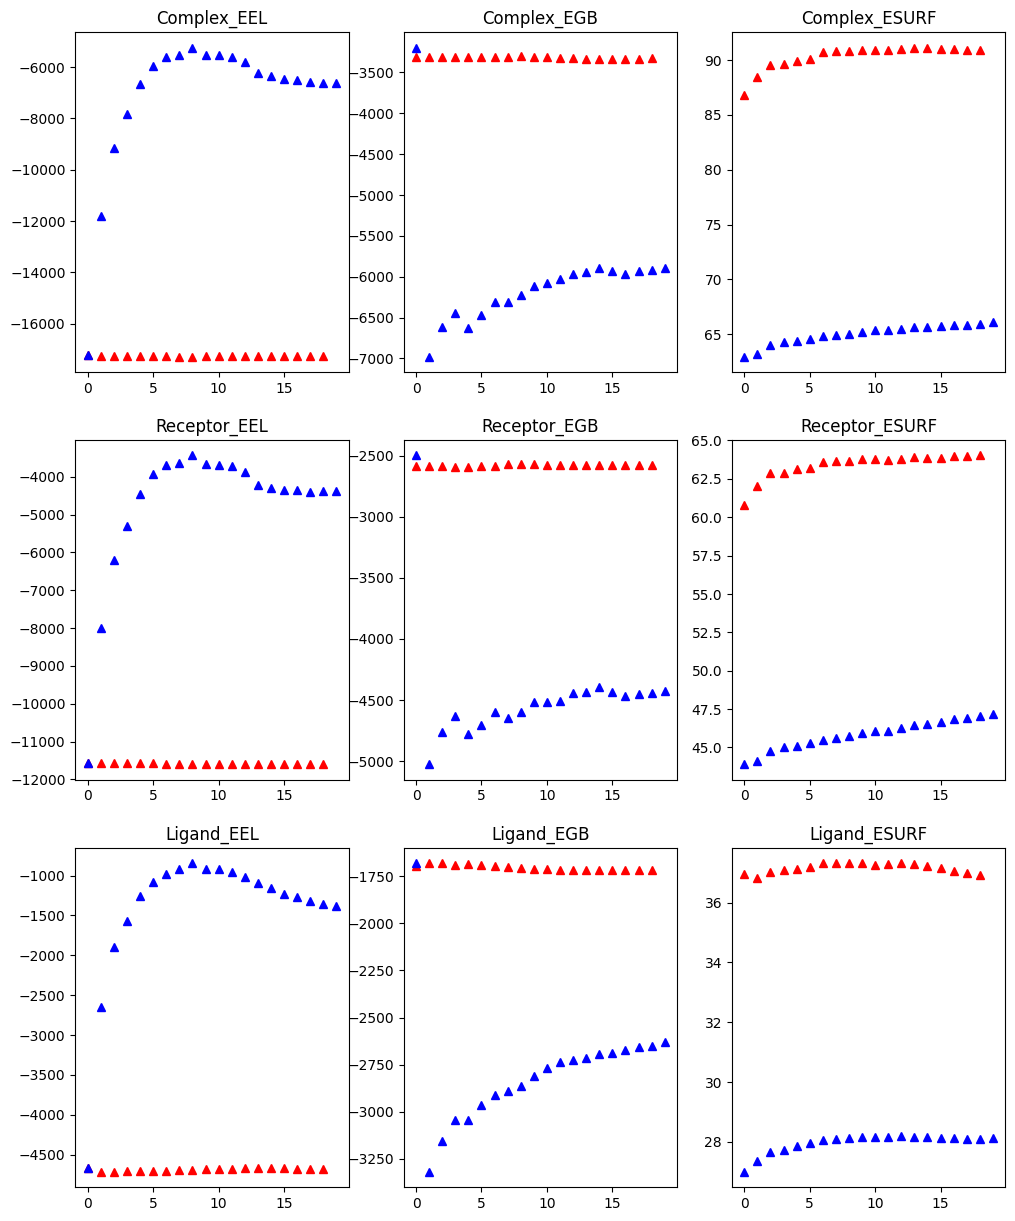

In [10]:
fig, axs = plt.subplots(3, 3, figsize=(12, 15))
n = 0
for i in range(3):
    for j in range(3):
        axs[i, j].plot([x[allkeys[n]] for x in mmpbsa], 'r^')
        axs[i, j].plot([x[allkeys[n]] for x in gbnsr6_acc], 'b^')
        axs[i, j].set_title(allkeys[n])
        n += 1

In [8]:
counter_con = 0
for k in allkeys:
    for i in range(len(mmpbsa) - 1):
        diff_mm = mmpbsa[i + 1][k] - mmpbsa[i][k]
        diff_gb = gbnsr6_acc[i + 1][k] - gbnsr6_acc[i][k]
        if diff_mm/np.abs(diff_mm) != diff_gb/np.abs(diff_gb):
            counter_con += 1
            print('Methods have contradiction between frames %d and %d in %s'%(i, i + 1, k))

Methods have contradiction between frames 0 and 1 in Complex_EEL
Methods have contradiction between frames 1 and 2 in Complex_EEL
Methods have contradiction between frames 2 and 3 in Complex_EEL
Methods have contradiction between frames 3 and 4 in Complex_EEL
Methods have contradiction between frames 4 and 5 in Complex_EEL
Methods have contradiction between frames 6 and 7 in Complex_EEL
Methods have contradiction between frames 8 and 9 in Complex_EEL
Methods have contradiction between frames 9 and 10 in Complex_EEL
Methods have contradiction between frames 10 and 11 in Complex_EEL
Methods have contradiction between frames 11 and 12 in Complex_EEL
Methods have contradiction between frames 12 and 13 in Complex_EEL
Methods have contradiction between frames 14 and 15 in Complex_EEL
Methods have contradiction between frames 0 and 1 in Complex_EGB
Methods have contradiction between frames 2 and 3 in Complex_EGB
Methods have contradiction between frames 3 and 4 in Complex_EGB
Methods have con

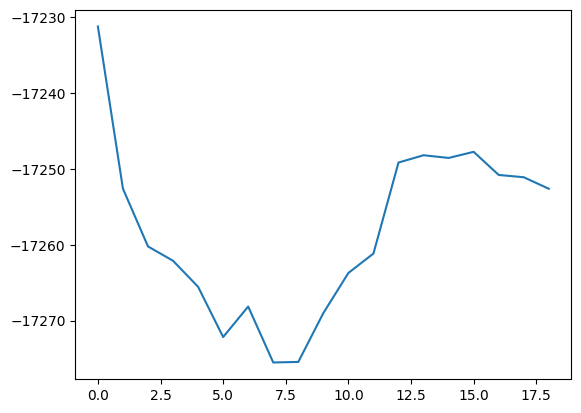

In [9]:
plt.plot([x['Complex_EEL'] for x in mmpbsa])